<a href="https://colab.research.google.com/github/HABIB5585/Sales_prediction/blob/main/Prediction_of_Product__Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prediction of Product Sales

- Author: Marzougui Med Habib

## Project Overview

#Load and Inspect data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

In [3]:
fname='/content/drive/MyDrive/CodingDojo/01-Fundamentals/Week02/Data/sales_predictions_2023.csv'
df=pd.read_csv(fname)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
df.shape

(8523, 12)

**`there are 12 columns and 8523 rows in our DataFrame`**

In [7]:
# these are the types of each column in our DataFrame
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

##Clean Data

In [8]:
df.duplicated().sum()
#there aren't duplicated rows in this DataFrame

0

In [9]:
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [10]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [11]:
# fill the NaN with (-1)
df['Item_Weight']=df['Item_Weight'].fillna(-1)

In [12]:
#there are no more missing values in the column 'Item_Weight'
df['Item_Weight'].isna().sum()

0

In [13]:
#check the values in the column 'Outlet_Size'
df[['Outlet_Size']]

,Outlet_Size
0,Medium
1,Medium
2,Medium
3,NaN
4,High
...,...
8518,High
8519,NaN
8520,Small
8521,Medium


In [14]:
# fill the NaN with ('Missing')
df['Outlet_Size']=df['Outlet_Size'].fillna('Missing')

In [15]:
#there is no more NaN in the column 'Outlet_Size'
df['Outlet_Size'].isna().sum()

0

In [16]:
# there is no more NaN in our DataFrame
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
#select only the categorical cols
string_cols=df.select_dtypes('object').columns
string_cols

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [18]:
for col in string_cols:
  print(f'value counts fo {col}')
  print(df[col].value_counts())
  print('\n')

value counts fo Item_Identifier
FDW13    10
FDG33    10
NCY18     9
FDD38     9
DRE49     9
         ..
FDY43     1
FDQ60     1
FDO33     1
DRF48     1
FDC23     1
Name: Item_Identifier, Length: 1559, dtype: int64


value counts fo Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


value counts fo Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


value counts fo Outlet_Identifier
OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT0

In [19]:
# Repalce 'Low Fat' by 'low fat', 'LF' by 'low fat' and 'reg' by 'Regular'
df['Item_Fat_Content']=df['Item_Fat_Content'].replace({'Low Fat':'low fat','LF':'low fat','reg':'Regular'})
df['Item_Fat_Content'].value_counts()

low fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [20]:
# select the numeric cols
num_cols=df.select_dtypes('number').columns
# obtain description of the numeric cols
df[num_cols].describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,10.478936,0.066132,140.992782,1997.831867,2181.288914
std,6.720742,0.051598,62.275067,8.371760,1706.499616
min,-1.000000,0.000000,31.290000,1985.000000,33.290000
25%,6.650000,0.026989,93.826500,1987.000000,834.247400
50%,11.000000,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


#Exploratory Data Analysis

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

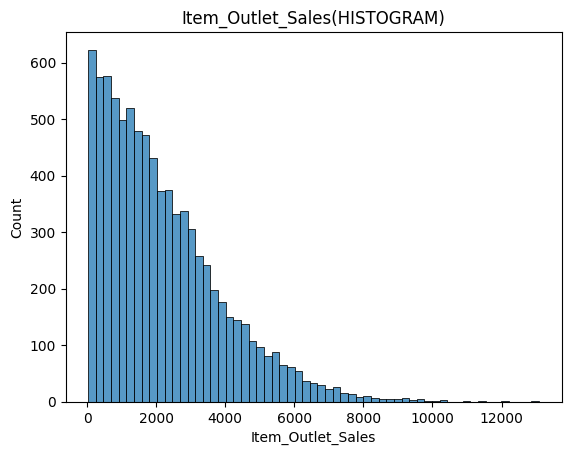

In [23]:
#a histogram with informations of the column (Item_Outlet_Sales)
ax=sns.histplot(data=df,x="Item_Outlet_Sales")
ax.set_title("Item_Outlet_Sales(HISTOGRAM)");

<ipython-input-35-a1a42f571e48>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');


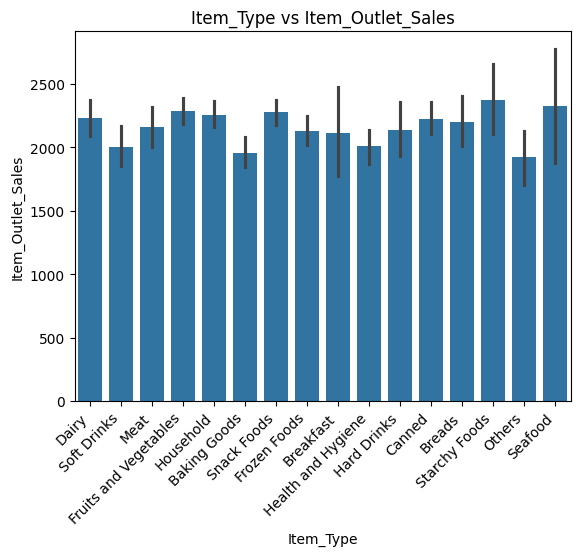

In [35]:
#The variation of item outlet sales based on item type
ax=sns.barplot(data=df,x="Item_Type",y='Item_Outlet_Sales');
ax.set_xticklabels(ax.get_xticklabels(),rotation=45,ha='right');
ax.set_title("Item_Type vs Item_Outlet_Sales");

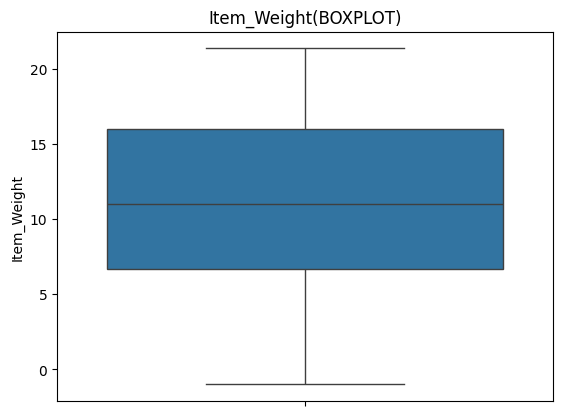

In [36]:
#a boxplot with informations of the column (Item_Weight)
ax=sns.boxplot(data=df,y="Item_Weight")
ax.set_title("Item_Weight(BOXPLOT)");

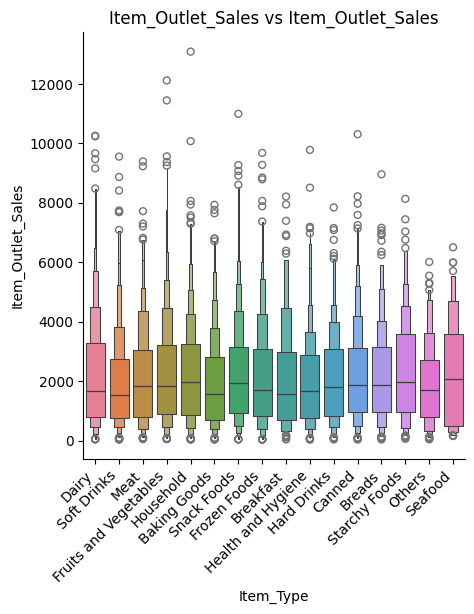

In [47]:
# a boxenplot that show the the information about the "Item_Outlet_Sales"  of each "Item_Type"
g=sns.catplot(data=df,x="Item_Type",y='Item_Outlet_Sales',hue='Item_Type',kind="boxen",dodge=False);
g.set_xticklabels(rotation=45, ha="right");
g.ax.set_title("Item_Outlet_Sales vs Item_Outlet_Sales");

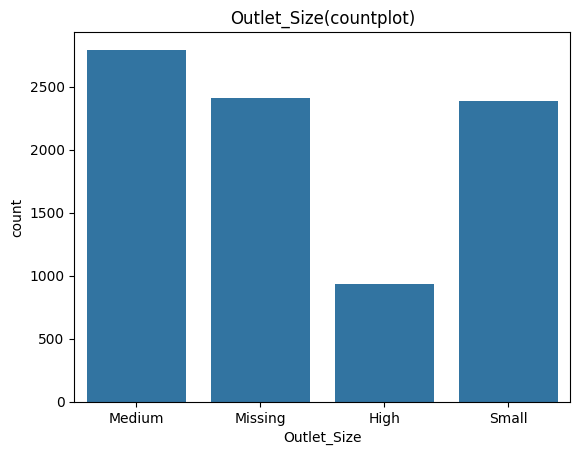

In [37]:
#a countplot of the outlet_size column
ax=sns.countplot(data=df,x="Outlet_Size")
ax.set_title("Outlet_Size(countplot)");

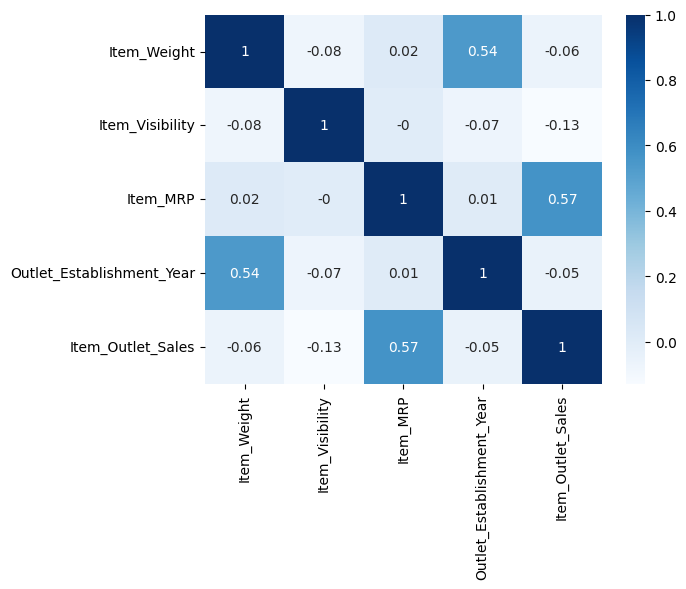

In [38]:
# a heat map of the correlation between all the numeric columns
corr=df.corr(numeric_only=True).round(2)
ax=sns.heatmap(data=corr,cmap='Blues',annot=True);

##Feature Inspection